# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import warnings

In [6]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

In [7]:
df0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [8]:
print(df0.info())
print('ПРОПУСКИ')
print(df0.isna().sum())
print('ДУБЛИКАТЫ', df0.duplicated().sum())
print()
print(df1.info())
print('ПРОПУСКИ')
print(df1.isna().sum())
print('ДУБЛИКАТЫ', df1.duplicated().sum())
print()
print(df2.info())
print('ПРОПУСКИ')
print(df2.isna().sum())
print('ДУБЛИКАТЫ', df2.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
ПРОПУСКИ
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
ДУБЛИКАТЫ 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
ПРОПУСКИ
id         0


В таблицах нет пропусков и дубликатов, типы данных верны. Данные готовы к работе. 

## Обучение и проверка модели

### Разбеение данных

In [9]:
target_0 = df0['product']
features_0 = df0.drop(['product', 'id'] , axis=1)

target_1 = df1['product']
features_1 = df1.drop(['product', 'id'] , axis=1)

target_2 = df2['product']
features_2 = df2.drop(['product', 'id'] , axis=1)

In [10]:
#Разбеение данных на обучающую и валидационную выборки
features_0_train, features_0_valid, target_0_train, target_0_valid = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)
features_1_train, features_1_valid, target_1_train, target_1_valid = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)
features_2_train, features_2_valid, target_2_train, target_2_valid = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

In [11]:
#маштабирование признаков
warnings.filterwarnings('ignore')
scaler=StandardScaler()
scaler.fit(features_0_train)
features_0_train = scaler.transform(features_0_train)
features_0_valid = scaler.transform(features_0_valid)
scaler.fit(features_1_train)
features_1_train = scaler.transform(features_1_train)
features_1_valid = scaler.transform(features_1_valid)
scaler.fit(features_2_train)
features_2_train = scaler.transform(features_2_train)
features_2_valid = scaler.transform(features_2_valid)

### обучение модели и предсказание

#### регион 0

In [12]:
model_0 = LinearRegression()

model_0.fit(features_0_train, target_0_train)
predicted_valid_0 = model_0.predict(features_0_valid)

print('Mean Absolute Error:', mean_absolute_error(target_0_valid, predicted_valid_0)) 
print('Mean Squared Error:', mean_squared_error(target_0_valid, predicted_valid_0)) 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(target_0_valid, predicted_valid_0)))


#коэффициенты регрессионной модели
coeff_0 = pd.DataFrame(model_0.coef_, features_0.columns, columns=['Coefficient'])
coeff_0

Mean Absolute Error: 30.919600777151313
Mean Squared Error: 1412.2129364399243
Root Mean Squared Error: 37.5794217150813


,Coefficient
f0,3.132274
f1,-7.108177
f2,21.425564


Регрессионная модель должна находить наиболее оптимальные коэффициенты для всех атрибутов.
У нас при увеличении на единицу объемов запасов скважены признак f0 увеличивается на 3.1 а f2 на 21.4, признак f1 учменьшается на 7.1. Очень большой показатель средней аболютной ошибки (далек от 0,0), так же MSE, RMSE больше 0 на много. Это говорит о том что наша модель переоценена и алгоритм не был очень точным. Причиной этому скорей всего ложное предположение, что данные имеют линейную зависимость. 

<AxesSubplot:xlabel='product'>

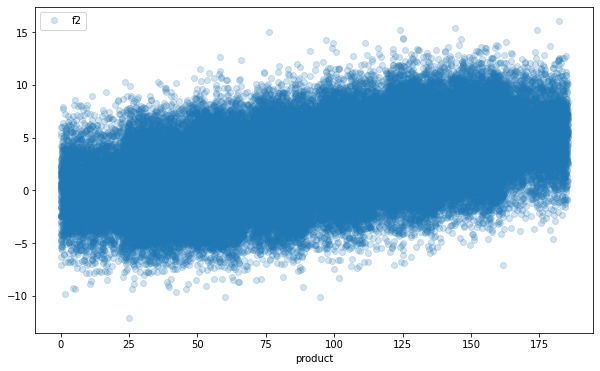

In [13]:
df0.plot(x='product', y=['f2'], style='o', figsize=(10,6), alpha=0.2)

In [14]:
df0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


    И правда линейной зависимости не прослеживается, она очень слабая, только у f2 есть слабая линейная зависимость. 

In [15]:
#сравнение фактических выходные значения с прогнозируемыми значениями
data_0 = pd.DataFrame({'Actual': target_0_valid, 'Predicted': predicted_valid_0})
print(data_0)
print()
print('СРЕДНИЙ ЗАПАС СЫРЬЯ')
data_0.mean()

           Actual   Predicted
71751   10.038645   95.894952
80493  114.551489   77.572583
2655   132.603635   77.892640
53233  169.072125   90.175134
91141  122.325180   70.510088
...           ...         ...
12581  170.116726  103.037104
18456   93.632175   85.403255
73035  127.352259   61.509833
63834   99.782700  118.180397
43558  177.821022  118.169392

[25000 rows x 2 columns]

СРЕДНИЙ ЗАПАС СЫРЬЯ


Actual       92.078597
Predicted    92.592568
dtype: float64

Наблюдается низкая точность прогнозов. Средние значения отличаются начиная с десятых. 

#### регион 1

In [16]:
model_1 = LinearRegression()

model_1.fit(features_1_train, target_1_train)
predicted_valid_1 = model_1.predict(features_1_valid)

print('Mean Absolute Error:', mean_absolute_error(target_1_valid, predicted_valid_1)) 
print('Mean Squared Error:', mean_squared_error(target_1_valid, predicted_valid_1)) 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(target_1_valid, predicted_valid_1)))


#коэффициенты регрессионной модели
coeff_1 = pd.DataFrame(model_1.coef_, features_1.columns, columns=['Coefficient'])
coeff_1

Mean Absolute Error: 0.7187662442124758
Mean Squared Error: 0.7976263360391157
Root Mean Squared Error: 0.893099286775617


,Coefficient
f0,-1.299483
f1,-0.112935
f2,45.886033


Регрессионная модель должна находить наиболее оптимальные коэффициенты для всех атрибутов. У нас при увеличении на единицу объемов запасов скважены признак f0 уменьшается на 1,2 а f1 на 0,11, признак f2 увеличивается на 45,8. Хороший показатель средней аболютной ошибки (близок 0,0), так же MSE, RMSE близко к 0. Это говорит о том что наш алгоритм достаточно точный. 

In [17]:
df1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


Как мы видим очень хорошая корреляция у f2 с product, линейная зависимость прослеживается однозначно. 

<AxesSubplot:xlabel='product'>

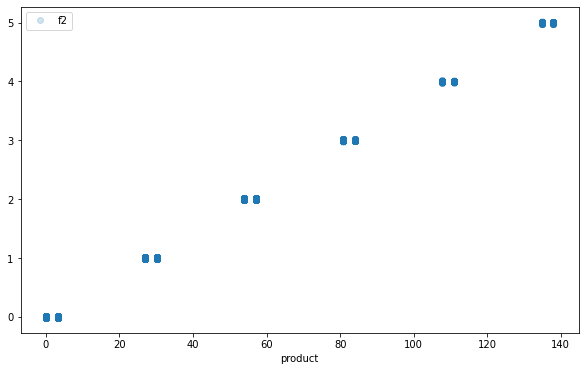

In [18]:
df1.plot(x='product', y=['f2'], style='o', figsize=(10,6), alpha=0.2)

In [19]:
#сравнение фактических выходные значения с прогнозируемыми значениями
data_1 = pd.DataFrame({'Actual': target_1_valid, 'Predicted': predicted_valid_1})
print(data_1)
print()
print('СРЕДНИЙ ЗАПАС СЫРЬЯ')
data_1.mean()

           Actual   Predicted
71751   80.859783   82.663314
80493   53.906522   54.431786
2655    30.132364   29.748760
53233   53.906522   53.552133
91141    0.000000    1.243856
...           ...         ...
12581  137.945408  136.869211
18456  110.992147  110.693465
73035  137.945408  137.879341
63834   84.038886   83.761966
43558   53.906522   53.958466

[25000 rows x 2 columns]

СРЕДНИЙ ЗАПАС СЫРЬЯ


Actual       68.723136
Predicted    68.728547
dtype: float64

Модель очень точно предсказывает показатель product, среднее значение табличные и предсказанные отличаются после тысячного числа, в отличии от региона 0, где отличия в числах были уже в десятых. Наблюдается высокая точность прогнозов.

#### регион 2

In [20]:
model_2 = LinearRegression()

model_2.fit(features_2_train, target_2_train)
predicted_valid_2 = model_2.predict(features_2_valid)

print('Mean Absolute Error:', mean_absolute_error(target_2_valid, predicted_valid_2)) 
print('Mean Squared Error:', mean_squared_error(target_2_valid, predicted_valid_2)) 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(target_2_valid, predicted_valid_2)))


#коэффициенты регрессионной модели
coeff_2 = pd.DataFrame(model_2.coef_, features_2.columns, columns=['Coefficient'])
coeff_2

Mean Absolute Error: 32.792652105481814
Mean Squared Error: 1602.3775813236196
Root Mean Squared Error: 40.02970873393434


,Coefficient
f0,0.053581
f1,-0.072505
f2,19.819652


Регрессионная модель должна находить наиболее оптимальные коэффициенты для всех атрибутов. У нас при увеличении на единицу объемов запасов скважены признак f0 увеличивается на 0,05 а f2 на 19,8, признак f1 учменьшается на 0,07. Очень большой показатель средней аболютной ошибки (далек от 0,0), так же MSE, RMSE больше 0 на много. Это говорит о том что наша модель переоценена и алгоритм не был очень точным. Причиной этому скорей всего ложное предположение, что данные имеют линейную зависимость.

In [21]:
df2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Видно что у f2 с product корреляция чуть больше чем у f0 и f1, но до значения 0,99, как у региона 1 далеко. График это подтверждает.  

<AxesSubplot:xlabel='product'>

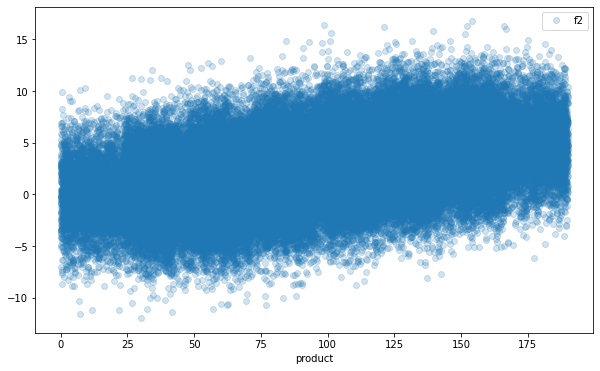

In [22]:
df2.plot(x='product', y=['f2'], style='o', figsize=(10,6), alpha=0.2)

In [23]:
#сравнение фактических выходные значения с прогнозируемыми значениями
data_2 = pd.DataFrame({'Actual': target_2_valid, 'Predicted': predicted_valid_2})
print(data_2)
print()
print('СРЕДНИЙ ЗАПАС СЫРЬЯ')
data_2.mean()

           Actual   Predicted
71751   61.212375   93.599633
80493   41.850118   75.105159
2655    57.776581   90.066809
53233  100.053761  105.162375
91141  109.897122  115.303310
...           ...         ...
12581   28.492402   78.765887
18456   21.431303   95.603394
73035  125.487229   99.407281
63834   99.422903   77.779912
43558  127.445075  129.032417

[25000 rows x 2 columns]

СРЕДНИЙ ЗАПАС СЫРЬЯ


Actual       94.884233
Predicted    94.965046
dtype: float64

СРедние значения различаются с десятых, как у региона 0. По данным видно, причем хорошо что можель предсказывает плохо, данные имеют большие различия с предсказанными. 

Итог: Лучше всего модель линейной регрессии предсказывает на регионе 1. Там хорошие показатели средних и абсолютной ошиьок. И видно по предсказанным данным как близко они находятся к реальным.  

In [24]:
#Есть отрицательные предсказанные значения для региона 1 
print(data_1[data_1['Predicted'] < 0])
print()
#видно что отрицательные значения появляются когда Actual 0. 
#Но отрицательных знач. не может быть, т.к. запас скважены не может уходить в минус.
#Заменим их на 0. Это логично, если в скважене 0 объем то и по предсказаниям он должен быть 0. 
data_1.loc[data_1['Predicted'] < 0, 'Predicted'] = 0
data_1.head()

       Actual  Predicted
60458     0.0  -0.387515
52697     0.0  -0.044624
32583     0.0  -0.246723
98899     0.0  -0.347300
95594     0.0  -0.132285
...       ...        ...
68293     0.0  -0.208028
93243     0.0  -0.436497
25841     0.0  -0.782472
89110     0.0  -0.247937
68985     0.0  -0.219393

[539 rows x 2 columns]



,Actual,Predicted
71751,80.859783,82.663314
80493,53.906522,54.431786
2655,30.132364,29.748760
53233,53.906522,53.552133
91141,0.000000,1.243856


## Подготовка к расчёту прибыли

на 200скважин выделяется 10млр.р. в одном регионе. На одну скважину выделяется 50мил.р. Если 1 баррель приносит 450р. Тогда примерно 111111,1 баррель должно быть в одной скважине - это и будет досаточный объем сырья для безубыточной разработки одной новой скважины. 

In [25]:
amount = 10**10
barrel = 450000

Если сравнивать со средним запаом в регионах то все числа меньше чем 111111 баррель. Получается запас сырья в скважинах меньше, чем точка безубыточности.
* Среднее в скважине 0 = 92.078597 тыс.б.
* Среднее в скважине 1 = 68.723136 тыс.б.
* Среднее в скважине 2 = 94.884233 тыс.б.

## Расчёт прибыли

In [26]:
#прибылm по выбранным скважинам и предсказаниям модели
def profit(predicted, actual):
    predicted_best = predicted.sort_values(ascending=False)
    profit_actual = actual[predicted_best.index][:200].sum() * barrel - amount
    profit_predict = predicted_best.sum() * barrel - amount
    return profit_actual, profit_predict

## Расчёт рисков 

In [27]:
state = np.random.RandomState(12345)

In [28]:
def bootstrap(data):
    values_actual=[]
    values_predict=[]
    actual = data['Actual']
    predicted = data['Predicted']
    
    for i in range(1000):
        target_sample = actual.sample(500, replace=True, random_state=state)
        predicted_sample = predicted[target_sample.index]
        profit_actual, profit_predict = profit(predicted_sample, target_sample)
        values_actual.append(profit_actual)
        values_predict.append(profit_predict)
    
    values_actual = pd.Series(values_actual)
    values_predict = pd.Series(values_predict)
    
    mean_actual = values_actual.sum() / len(values_actual)
    mean_predict = values_predict.sum() / len(values_predict)
    
    quantile_low_actual = values_actual.quantile(0.025)
    quantile_up_actual = values_actual.quantile(0.975)
    
    quantile_low_predict = values_predict.quantile(0.025)
    quantile_up_predict = values_predict.quantile(0.975)
    
    lesion_actual = values_actual[values_actual < 0].count() / len(values_actual) #убыток
    lesion_predict = values_predict[values_predict < 0].count() / len(values_predict)
    return ('ACTUAL','средняя прибыль actual:', mean_actual,
            '95%-й доверительный интервал actual:', (quantile_low_actual, quantile_up_actual), 
            'убыток actual:', lesion_actual,
           'PREDICT','средняя прибыль predict:', mean_predict,
            '95%-й доверительный интервал predict:', (quantile_low_predict, quantile_up_predict), 
            'убыток predict:', lesion_predict)

In [29]:
bootstrap(data_0)

('ACTUAL',
 'средняя прибыль actual:',
 425938526.91059244,
 '95%-й доверительный интервал actual:',
 (-102090094.83793654, 947976353.3583689),
 'убыток actual:',
 0.06,
 'PREDICT',
 'средняя прибыль predict:',
 10835010714.818865,
 '95%-й доверительный интервал predict:',
 (10390103762.87162, 11286405231.783585),
 'убыток predict:',
 0.0)

In [30]:
bootstrap(data_1)

('ACTUAL',
 'средняя прибыль actual:',
 518259493.6973249,
 '95%-й доверительный интервал actual:',
 (128123231.43308444, 953612982.0669085),
 'убыток actual:',
 0.003,
 'PREDICT',
 'средняя прибыль predict:',
 5484872853.625756,
 '95%-й доверительный интервал predict:',
 (4603164684.383744, 6412617141.447488),
 'убыток predict:',
 0.0)

In [31]:
bootstrap(data_2)

('ACTUAL',
 'средняя прибыль actual:',
 420194005.3440501,
 '95%-й доверительный интервал actual:',
 (-115852609.16001143, 989629939.8445739),
 'убыток actual:',
 0.062,
 'PREDICT',
 'средняя прибыль predict:',
 11363458457.133598,
 '95%-й доверительный интервал predict:',
 (11017604873.174583, 11745577856.646103),
 'убыток predict:',
 0.0)

По данным результатам видно, что и по предсказанным данным модели и по целевым лучший регион номер 1 (по условию регион 2). Так как у него самая большая прибыль, процент убытков самый низки 0,3%. 95% доверительный интервал (128123231.43308444, 953612982.0669085). Стоит отметить что модель лучше всего предсказывает как раз для региона 1. 

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован